# Tasks
* Load the data into _R_ or _Python_
  - Notebooks (e.g. Jupyter)  make us smile, but scripts work too.
* Perform exploratory data analysis.
  - Be verbose as to what you are looking at and why.
  - Keep in mind the primary task below.
* Perform data cleaning, if necessary.
  - Again, explain your methodology and  reasoning behind it.
* **Primary Task** - Answer the following questions:  
   - Which single field in `dataset.csv` best describes the `SalePrice` field?
   - Why did you choose this field? Please thoroughly explain your reasoning. 	



In [1]:
import os, gc, warnings
warnings.filterwarnings('ignore')

### Import the necessary python dependencies


In [2]:
import matplotlib.pyplot as plt
import  numpy as np
import pandas as pd
import random
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# Show all data columns
pd.set_option("display.max_column", 100)

## Data Wrangling  
<font size='2'>  
&nbsp; &nbsp; EDA and data cleaning is the foundation on which a good visualization is built.
</font>
<br>

In [4]:
df = pd.read_csv('./dataset.csv')

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [6]:
df.shape

(1460, 81)

In [7]:
coln = list(df.columns)[1::]
for a,b,c,d,e,f,g,h in zip(coln[0:11],coln[10:21],coln[20:31],coln[30:41],coln[40:51],coln[50:61],coln[60:71],coln[70:81]):
    print ('{:14}{:14}{:14}{:14}{:14}{:14}{:14}{}'.format(a,b,c,d,e,f,g,h))

MSSubClass    LandSlope     RoofStyle     BsmtCond      CentralAir    BedroomAbvGr  GarageCars    PoolArea
MSZoning      Neighborhood  RoofMatl      BsmtExposure  Electrical    KitchenAbvGr  GarageArea    PoolQC
LotFrontage   Condition1    Exterior1st   BsmtFinType1  1stFlrSF      KitchenQual   GarageQual    Fence
LotArea       Condition2    Exterior2nd   BsmtFinSF1    2ndFlrSF      TotRmsAbvGrd  GarageCond    MiscFeature
Street        BldgType      MasVnrType    BsmtFinType2  LowQualFinSF  Functional    PavedDrive    MiscVal
Alley         HouseStyle    MasVnrArea    BsmtFinSF2    GrLivArea     Fireplaces    WoodDeckSF    MoSold
LotShape      OverallQual   ExterQual     BsmtUnfSF     BsmtFullBath  FireplaceQu   OpenPorchSF   YrSold
LandContour   OverallCond   ExterCond     TotalBsmtSF   BsmtHalfBath  GarageType    EnclosedPorch SaleType
Utilities     YearBuilt     Foundation    Heating       FullBath      GarageYrBlt   3SsnPorch     SaleCondition
LotConfig     YearRemodAdd  BsmtQual   

### Checking for missing values / absence of values

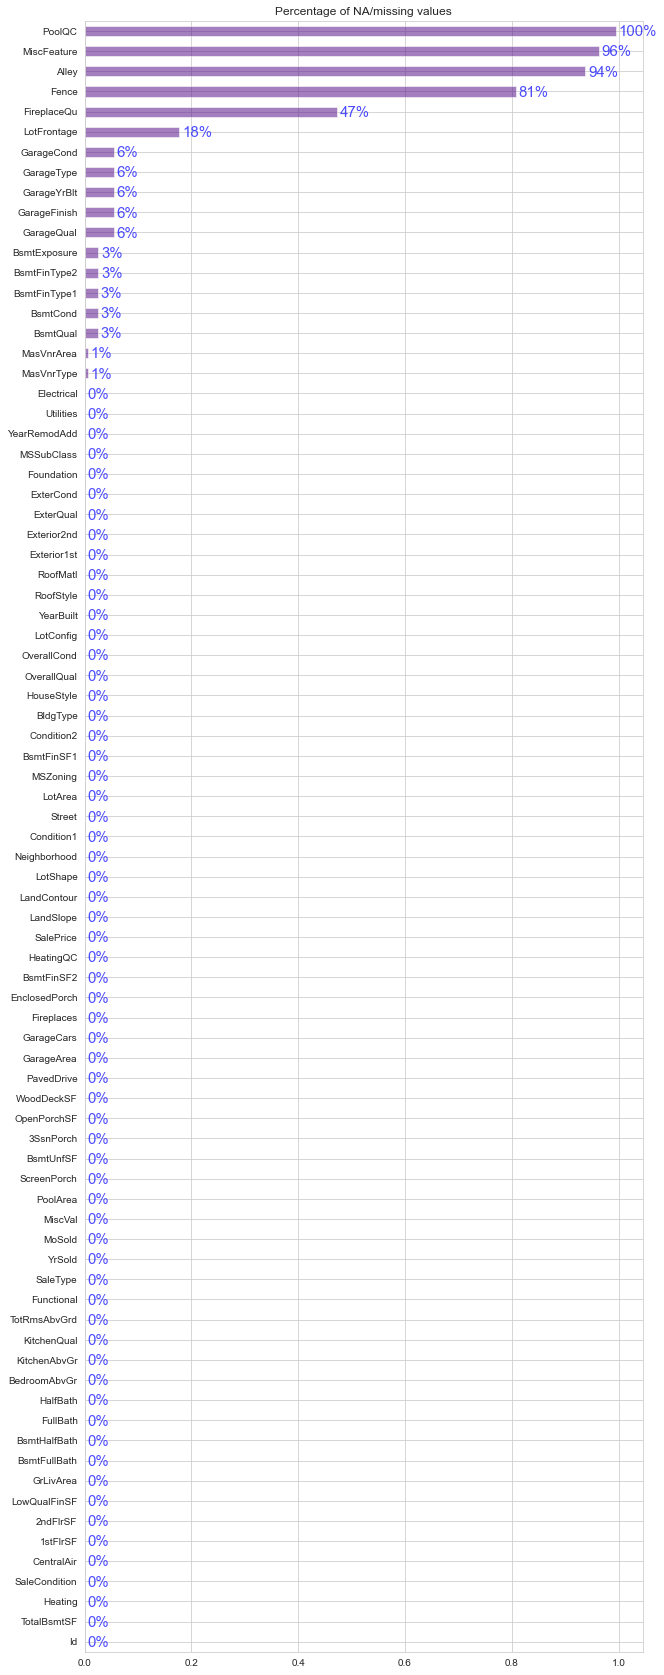

In [8]:
ax = df.isna().sum().transform(lambda x:x/df.shape[0]).sort_values().plot.barh(
    figsize=(10,30), title='Percentage of NA/missing values', color='indigo', alpha=0.5)
for i in ax.patches:
    ax.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(),2)*100))+'%', fontsize=15, color='b', alpha=0.7);

#### From the above Barchart we can observer that PoolQC has the hight "NA" not values followed by MscFeature 96%, Alley 94%, Fence 81% etc. "NA" doesn't indicate missing data, the columns came with a lot of "NA" text strings

In [9]:
def display_columns(columns_to_display):
    return df[columns_to_display][:100]

<font >There are four different generic data types defined that are casted as follows:
- continuous -> np.float64
- discrete -> actually np.int64 but np.float64 because of missing values
- nominal -> object (str)
- ordinal -> object (str)
</font>

In [10]:
TARGET_VARIABLE = ["SalePrice"]

=============================================================================================
<h4>Continous Columns and their full description</h4>
<pre> 
1stFlrSF =======>  First Floor square feet
2ndFlrSF =======>  Second floor square feet
3SsnPorch =======>  Three season porch area in square feet
BsmtUnfSF  =======> Unfinished square feet of basement area
BsmtFinSF1 =======>  Type 1 finished square feet
BsmtFinSF2 =======> Type 2 finished square feet
EnclosedPorch =======> Enclosed porch area in square feet
GarageArea =======> Size of garage in square feet
GrLivArea =======>  Above grade (ground) living area square feet
LotArea =======> Lot size in square feet
LotFrontage =======> Linear feet of street connected to property
LowQualFinSF =======> Low quality finished square feet (all floors)
MasVnrArea =======> Masonry veneer area in square feet
MiscVal =======>  $Value of miscellaneous feature
OpenPorchSF =======> Open porch area in square feet
PoolArea =======>  Pool area in square feet
ScreenPorch =======>  Screen porch area in square feet
TotalBsmtSF =======>  Total square feet of basement area
WoodDeckSF =======>  Wood deck area in square feet
</pre>

In [11]:
CONTINOUS_COLUMNS = ["1stFlrSF", "2ndFlrSF", "3SsnPorch","BsmtUnfSF","BsmtFinSF1", "BsmtFinSF2","EnclosedPorch","GarageArea", "GrLivArea","LotArea","LotFrontage","LowQualFinSF","MasVnrArea","MiscVal","OpenPorchSF","PoolArea","ScreenPorch","TotalBsmtSF","WoodDeckSF"]
continous_columns = CONTINOUS_COLUMNS

In [12]:
# display_columns(continous_columns)[:5].info()

Except for the column Lot Frontage the columns with missing data only have a couple of missing values (i.e., < 1% of all the rows).

=============================================================================================
<h4>Discrete Columns and their full description</h4>
<pre> 
BedroomAbvGr  =======> Bedrooms above grade (does NOT include basement bedrooms)
BsmtFullBath  =======> Basement full bathrooms
BsmtHalfBath  =======> Basement half bathrooms
Fireplaces =======> Number of fireplaces
FullBath =======> Full bathrooms above grade
GarageCars =======> Size of garage in car capacity
GarageYrBlt =======> Year garage was built
HalfBath =======> Half baths above grade
KitchenAbvGr =======> Kitchens above grade
MoSold =======> Month Sold (MM)
TotRmsAbvGrd  =======> Total rooms above grade (does not include bathrooms)
YearBuilt =======> Original construction date
YearRemodAdd =======> Remodel date (same as construction date if no remodeling or additions)
YrSold =======> Year Sold (YYYY)
</pre>

The discrete columns have between 2 and 15 unique realizations each if year numbers are excluded from the analysis.

In [13]:
DISCRETE_COLUMNS = df[["BedroomAbvGr","BsmtFullBath", "BsmtHalfBath","Fireplaces","FullBath","GarageCars","GarageYrBlt","HalfBath","KitchenAbvGr","MoSold","TotRmsAbvGrd","YearBuilt","YearRemodAdd","YrSold"]]
discrete_columns = DISCRETE_COLUMNS

In [14]:
for column in DISCRETE_COLUMNS:
    mask = df[column].notnull()
    num_realizations = len(list(x for x in df.loc[mask, column].unique()))
    if column not in ("YearBuilt", "YearRemodAdd", "GarageYrBlt"):
        assert num_realizations < 15
    assert num_realizations > 2

In [15]:
# display_columns(discrete_columns).head()

Except for the <b>GarageYrBlt</b> column no variable has a significant number of missing values (i.e., > 1% of all rows).

In [16]:
# display_columns(discrete_columns)[:5].info()

=============================================================================================
<h4>Nominal Columns and their full description</h4>
<pre>
Alley =======> Type of alley access to property
BldgType =======> Type of dwelling
CentralAir =======> Central air conditioning
Condition1 =======> Proximity to various conditions
Condition2 =======> Proximity to various conditions (if more than one is present)
Exterior1st =======> Exterior covering on house
Exterior2nd  =======>  Exterior covering on house (if more than one material)
Foundation =======> Type of foundation
GarageType =======> Garage location
Heating =======> Type of heating
HouseStyle =======> Style of dwelling
LandContour =======> Flatness of the property
LotConfig =======> Lot configuration
MSSubClass =======> Identifies the type of dwelling involved in the sale.
MSZoning =======> Identifies the general zoning classification of the sale.
MasVnrType =======> Masonry veneer type
MiscFeature =======> Miscellaneous feature not covered in other categories
Neighborhood =======> Physical locations within Ames city limits (map available)
RoofMatl =======> Roof material
RoofStyle =======> Type of roof
SaleCondition =======> Condition of sale
SaleType =======> Type of sale
Street =======> Type of road access to property
</pre>

Except for the total of 28 neighborhoods, the nominal columns come with anywhere between 1 and 18 different labels each.

In [43]:
NOMINAL_COLUMNS = ["Alley","BldgType","CentralAir","Condition1","Condition2", "Exterior1st","Exterior2nd","Foundation","GarageType", "Heating","HouseStyle", "LandContour", "LotConfig", "MSSubClass", "MSZoning","MasVnrType","MiscFeature","Neighborhood","RoofMatl","RoofStyle","SaleCondition","Street","SaleType"]
nominal_columns = NOMINAL_COLUMNS

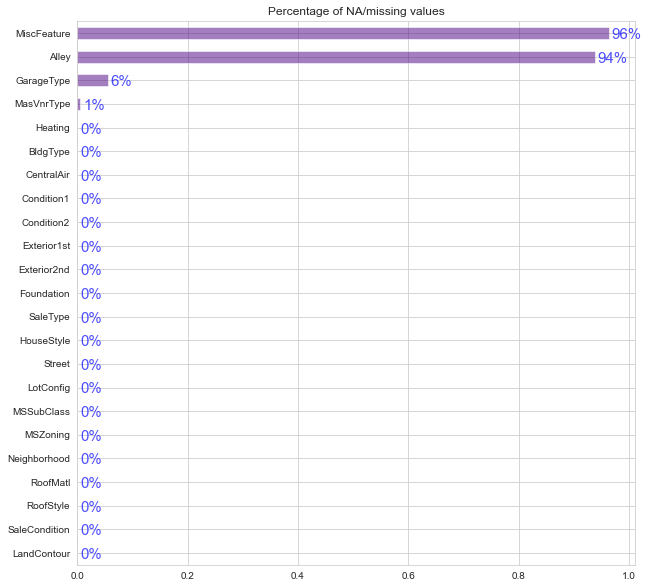

In [44]:
ax = df[nominal_columns].isna().sum().transform(lambda x:x/df[nominal_columns].shape[0]).sort_values().plot.barh(
    figsize=(10,10), title='Percentage of NA/missing values', color='indigo', alpha=0.5)
for i in ax.patches:
    ax.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(),2)*100))+'%', fontsize=15, color='b', alpha=0.7);

In [23]:
for column in NOMINAL_COLUMNS:
    mask = df[column].notnull()
    num_realizations = len(list(x for x in df.loc[mask, column].unique()))
    if column not in ("Neighborhood"):
        assert num_realizations < 18
    assert num_realizations > 1

In [24]:
# display_columns(nominal_columns).head()

In [25]:
# display_columns(nominal_columns)[:5].info()

=============================================================================================
<h4>Ordinal Columns and their full description</h4>
<pre>
BsmtCond       Evaluates the general condition of the basement
BsmtExposure   Refers to walkout or garden level walls
BsmtQual       Evaluates the height of the basement
BsmtFinType1  Rating of basement finished area
BsmtFinType2  Rating of basement finished area (if multiple types)
Electrical      Electrical system
ExterCond      Evaluates the present condition of the material on the exterior
ExterQual      Evaluates the quality of the material on the exterior
Fence           Fence quality
FireplaceQu    Fireplace quality
Functional      Home functionality (Assume typical unless deductions are warranted)
GarageCond     Garage condition
GarageFinish   Interior finish of the garage
GarageQual     Garage quality
HeatingQC      Heating quality and condition
KitchenQual    Kitchen quality
LandSlope      Slope of property
LotShape       General shape of property
OverallCond    Rates the overall condition of the house
OverallQual    Rates the overall material and finish of the house
PavedDrive     Paved driveway
PoolQC         Pool quality
Utilities       Type of utilities available
</pre>

The ordinal columns come with anywhere between 2 and 11 distinct labels each.

In [49]:
ORDINAL_COLUMNS = ["BsmtCond","BsmtExposure","BsmtQual","BsmtFinType1","BsmtFinType2","Electrical", "ExterCond","ExterQual","Fence","FireplaceQu","Functional","GarageCond","GarageFinish","GarageQual","HeatingQC","KitchenQual", "LandSlope","LotShape","OverallCond","OverallQual","PavedDrive","PoolQC","Utilities"]
ordinal_columns = ORDINAL_COLUMNS

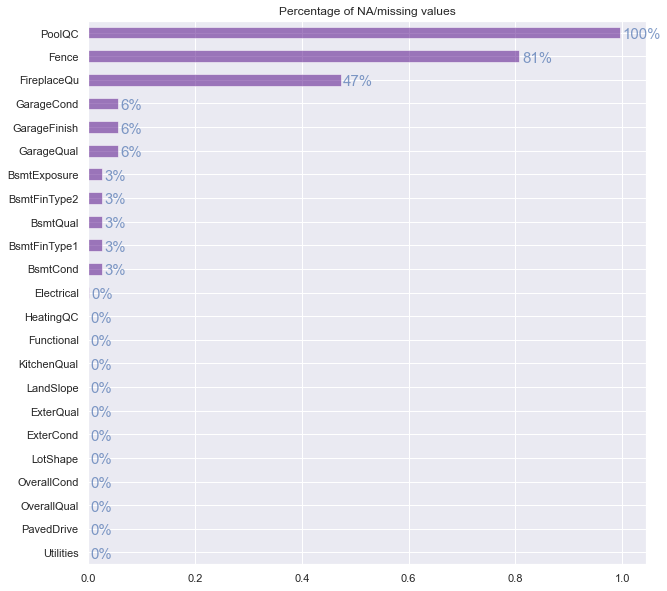

In [50]:
ax = df[ordinal_columns].isna().sum().transform(lambda x:x/df[ordinal_columns].shape[0]).sort_values().plot.barh(
    figsize=(10,10), title='Percentage of NA/missing values', color='indigo', alpha=0.5)
for i in ax.patches:
    ax.text(i.get_width()+0.005, i.get_y(), str(int(round(i.get_width(),2)*100))+'%', fontsize=15, color='b', alpha=0.7);

In [29]:
# display_columns(ordinal_columns).head()

In [30]:
# df[ordinal_columns].info()

=============================================================================================

In [31]:
# The number of numeric columns before making some type columns numerical...
len(df._get_numeric_data().columns)

38

In [32]:
# Columns 'Central_Air' is nicely binary...
df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [33]:
# Converting the values to 1 and 0 i.e 1 == "Y" and 0 == "N"
# df.CentralAir = df.CentralAir.map(lambda val: int(1) if val == 'Y' else int(0))

In [34]:
df.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [35]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [36]:
# Replace all quality designators in df with numbers

# {
#     'LwQ':int(6),
#     'GLQ':int(4),
#     'Ex': int(5),
#     'BLQ':int(5),
#     'Gd': int(4),
#     'TA': int(3),
#     'Av': int(3),
#     'ALQ':int(3),
#     'Fa': int(2),
#     'Mn': int(2),
#     'Rec':int(2),
#     'Po': int(1),
#     'Unf':int(1),
#     'No': int(1),
#     'Na': int(0),
#     "nan": int(0)
# }


#  Ex   Excellent
#  Gd   Good
#  TA   Typical/Average
#  Fa   Fair
#  Po   Poor


temp = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5,'Mn': 2, 'Av': 3,'No': 1,\
             'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6,'RFn': 4, 'Fin': 6,\
             'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7,\
             'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4,'Sev': 0, 'Mod': 1, 'Gtl': 2,'Y':1,'N':0,\
             'Reg':3, 'IR1':2, 'IR2':1, 'IR3':0,
'SBrkr':0, 'FuseA':1, 'FuseF':2, 'FuseP':3, 'Mix':4,
'Y': 2, 'P': 1, 'N': 0,
'AllPub':1, 'NoSeWa':0}

df.replace(inplace=True, to_replace=temp)

In [37]:
df['Electrical'].unique()

array([ 0.,  2.,  1.,  3.,  4., nan])

In [38]:
df.Functional.value_counts()

7    1360
5      34
6      31
1      15
3      14
2       5
0       1
Name: Functional, dtype: int64

In [700]:
df["Utilities"].unique()

array([1, 0])

In [701]:
# columns as floats or integers respectively.
for column in CONTINOUS_COLUMNS: 
    df[column] = df[column].astype(np.float64)
for column in DISCRETE_COLUMNS:
    df[column] = df[column].fillna(0)
    df[column] = df[column].astype(np.int64)

### Numeric columns

### create dummy variables in df for columns = 'Lot_Config' and 'Neighborhood'

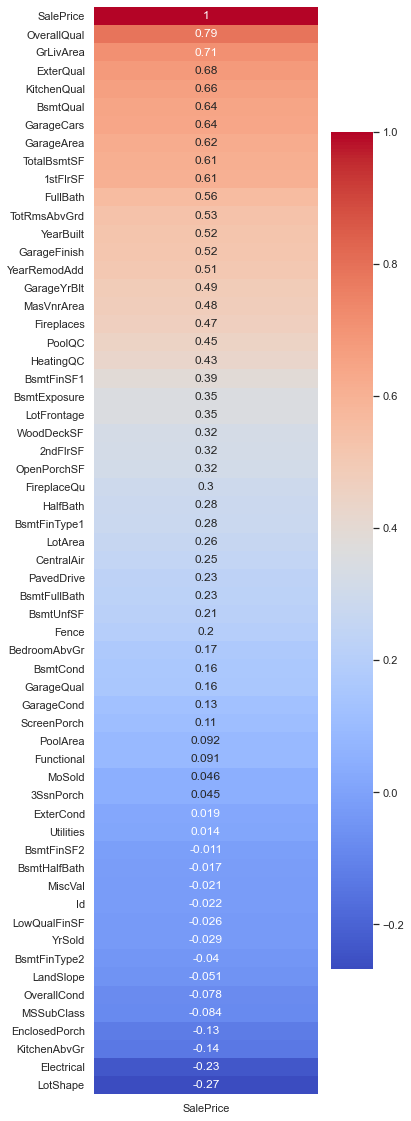

In [45]:
plt.figure(figsize=(5,20))
sns.set(font_scale=1)
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False), annot=True, cmap='coolwarm');

In [51]:
def plot_correlation(data, title):
    """Visualize a correlation matrix in a nice heatmap."""
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_title(title, fontsize=24)
    # Blank out the upper triangular part of the matrix.
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Use a diverging color map.
    cmap = sns.diverging_palette(240, 0, as_cmap=True)
    # Adjust the labels' font size.
    labels = data.columns
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_yticklabels(labels, fontsize=10)
    # Plot it.
    sns.heatmap(
        data, vmin=-1, vmax=1, cmap='coolwarm', center=0, linewidths=.5,
        cbar_kws={"shrink": .5}, square=True, mask=mask, ax=ax
    )

In [52]:
if "SalePrice" in continous_columns:
    continous_columns = set(continous_columns)
    columns = list(continous_columns)
    columns = sorted(columns)
    pearson = df[columns].corr(method="pearson")
else:
    continous_columns = set(continous_columns)
    columns = list(continous_columns)
    columns.extend(TARGET_VARIABLE)
    pearson = df[columns].corr(method="pearson")
# print(pearson)

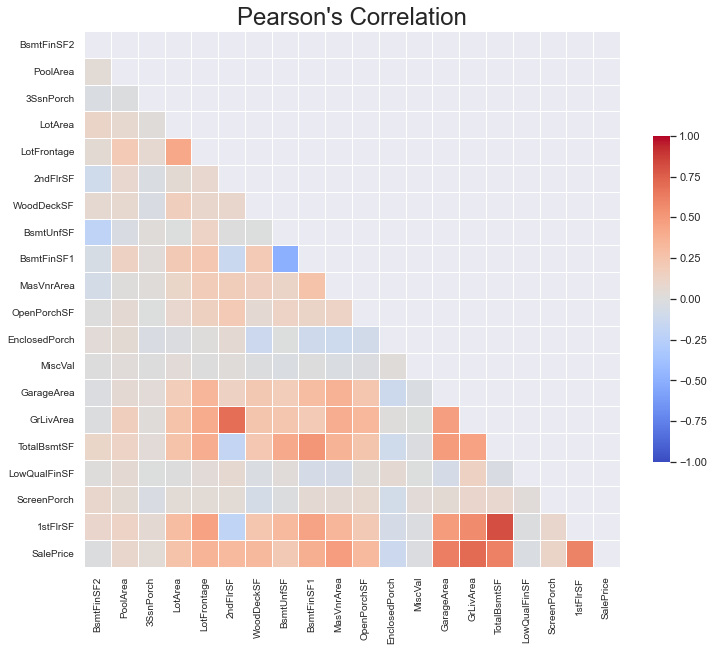

In [53]:
plot_correlation(pearson, "Pearson's Correlation")

Spearman
Spearman's correlation coefficient shows an ordinal rank relationship between two variables.

In [58]:
if "SalePrice" in ordinal_columns:
    ordinal_columns = set(ordinal_columns)
    columns = list(ordinal_columns)
    columns = sorted(columns)
    spearman = df[columns].corr(method="spearman")
else:
    ordinal_columnss = set(ordinal_columns)
    columns = list(ordinal_columns)
    columns.extend(TARGET_VARIABLE)
    spearman = df[columns].corr(method="spearman")
# print(spearman)

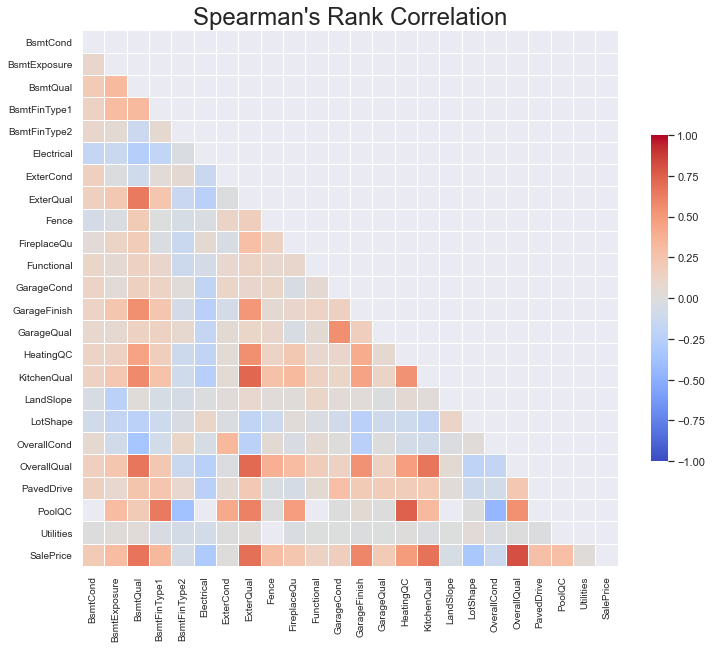

In [59]:
plot_correlation(spearman, "Spearman's Rank Correlation")

From the above visualization using the spearman correlaton plot the field that best describe the SalePrice is the OverallQual i.e the overall material and finish of the house.

# Descriptive Visualizations

The "main" plot used in this afterwards is <b>GrLivArea vs SalePrice</b> as the overall living area is the most correlated predictor (which is also very intuitive). Many of the nominal variables change the slopes of the regression lines for sub-groups of data points significantly.

In [60]:
new_variables = []

## Derived Characteristics
Certain characteristics of a house are assumed to have a "binary" influence on the sales price. For example, the existence of a pool could be an important predictor while the exact size of the pool can be deemed not so important.

The below cell creates boolean factor variables out of a set of numeric variables.

In [67]:
derived_variables = {
    "has 2ndFlr": "2ndFlrSF",
    "has Bsmt": "TotalBsmtSF",
    "has Fireplace": "Fireplaces",
    "has Garage": "GarageArea",
    "has Pool": "PoolArea",
    "has Porch": "OpenPorchSF",
}
# Factorize numeric columns.
for factor_column, column in derived_variables.items():
    df[factor_column] = df[column].apply(lambda x: 1 if x > 0 else 0)
derived_variables = list(derived_variables.keys())
new_variables.extend(derived_variables)

In [68]:
df[derived_variables].head()

has 2ndFlr  has Bsmt  has Fireplace  has Garage  has Pool  has Porch
0           1         1              0           1         0          1
1           0         1              1           1         0          0
2           1         1              1           1         0          1
3           1         1              1           1         0          1
4           1         1              1           1         0          1

2nd Floors
A second floor may have a positive effect on the sales price. However, having a second floor correlates with overall living space. The individual effect is therefore not as clear as it seems in the plot below.

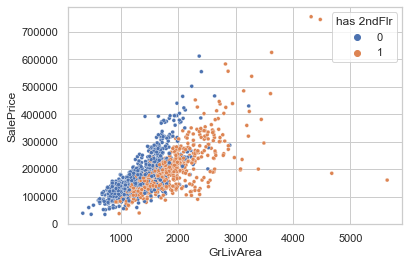

In [527]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has 2ndFlr", s=15, data=df);

### Basements

Nearly all houses have a basement. Therefore, <b>has Bsmt</b> is most likely not an important predictor.

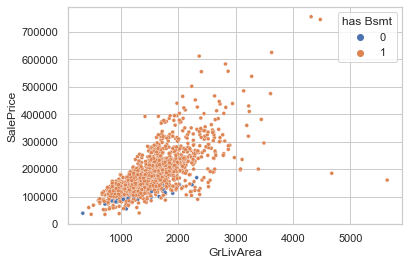

In [528]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has Bsmt", s=15, data=df);

### Fireplaces

Bigger houses are more likely to have a fireplace. Thus, the variable <b>has Fireplace</b> might be an interesting predictor.

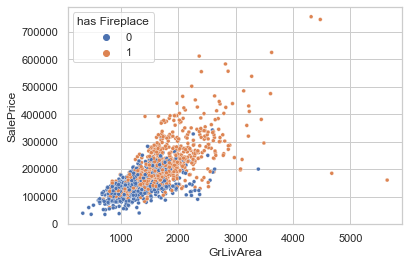

In [529]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has Fireplace", s=15, data=df);

### Garages

Holding the overall living area fixed adding a garage seems to affect the price positively. Thus, <b>has Garage</b> seems like an interesting predictor as well.

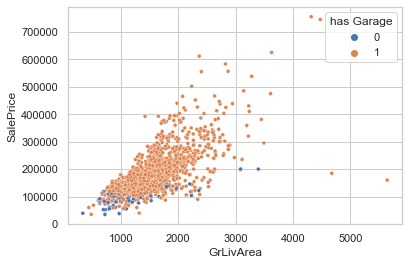

In [530]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has Garage", s=15, data=df);

### Pools

Unfortunately, from other visualization almost no one has a pool. The predictor <b> has Pool </b> seems quite uninteresting.

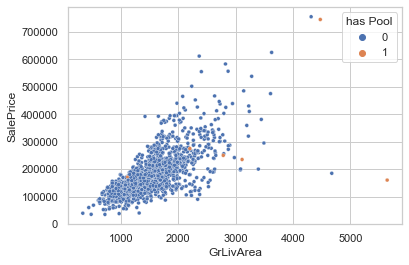

In [532]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has Pool", s=15, data=df);

### Porch

Most houses have a porch.

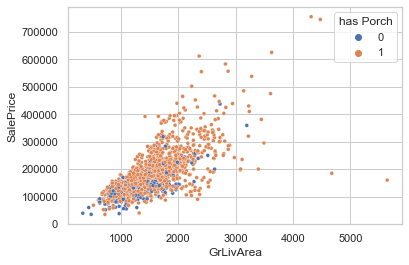

In [533]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="has Porch", s=15, data=df);

## Neighborhoods
Indeed, plotting the price distributions by neighborhood reveals significant differences in the price level.

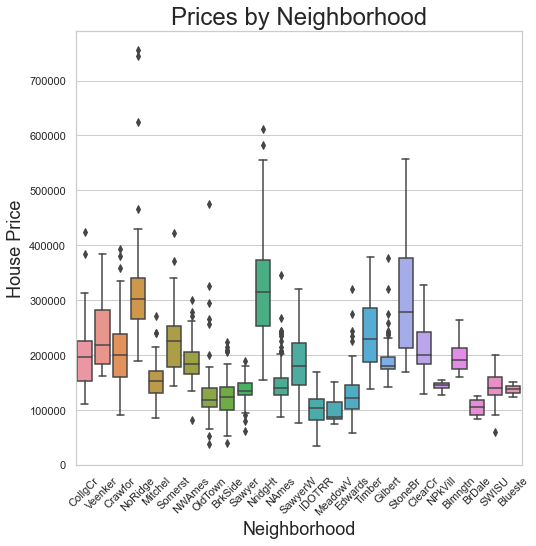

In [538]:
_, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df, ax=ax)
ax.set_title("Prices by Neighborhood", fontsize=24)
ax.set_xlabel("Neighborhood", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("House Price", fontsize=18);

The 28 neighborhoods are encoded as factor variables.

In [539]:
neighborhood = pd.get_dummies(df["Neighborhood"], prefix="nhood")
df = pd.concat([df, neighborhood], axis=1)
del df["Neighborhood"]
new_variables.extend(neighborhood.columns)

In [542]:
df[neighborhood.columns].head()

nhood_Blmngtn  nhood_Blueste  nhood_BrDale  nhood_BrkSide  nhood_ClearCr  \
0              0              0             0              0              0   
1              0              0             0              0              0   
2              0              0             0              0              0   
3              0              0             0              0              0   
4              0              0             0              0              0   

   nhood_CollgCr  nhood_Crawfor  nhood_Edwards  nhood_Gilbert  nhood_IDOTRR  \
0              1              0              0              0             0   
1              0              0              0              0             0   
2              1              0              0              0             0   
3              0              1              0              0             0   
4              0              0              0              0             0   

   nhood_MeadowV  nhood_Mitchel  nhood_NAmes  nhood_NPkVill  nhood_NWAmes  \
0              0              0            0              0             0   
1              0              0            0              0             0   
2              0              0            0              0             0   
3              0              0            0              0             0   
4              0              0            0              0             0   

   nhood_NoRidge  nhood_NridgHt  nhood_OldTown  nhood_SWISU  nhood_Sawyer  \
0              0              0              0            0             0   
1              0              0              0            0             0   
2              0              0              0            0             0   
3              0              0              0            0             0   
4              1              0              0            0             0   

   nhood_SawyerW  nhood_Somerst  nhood_StoneBr  nhood_Timber  nhood_Veenker  
0              0              0              0             0              0  
1              0              0              0             0              1  
2              0              0              0             0              0  
3              0              0              0             0              0  
4              0              0              0             0              0

## Nominal Features
This section investigates the rest of the nominal variables with regard to which realizations / encoding might be a useful predictor.

<h4>Nominal Columns and their full description</h4>
<pre>
Alley =======> Type of alley access to property
BldgType =======> Type of dwelling
CentralAir =======> Central air conditioning
Condition1 =======> Proximity to various conditions
Condition2 =======> Proximity to various conditions (if more than one is present)
Exterior1st =======> Exterior covering on house
Exterior2nd  =======>  Exterior covering on house (if more than one material)
Foundation =======> Type of foundation
GarageType =======> Garage location
Heating =======> Type of heating
HouseStyle =======> Style of dwelling
LandContour =======> Flatness of the property
LotConfig =======> Lot configuration
MSSubClass =======> Identifies the type of dwelling involved in the sale.
MSZoning =======> Identifies the general zoning classification of the sale.
MasVnrType =======> Masonry veneer type
MiscFeature =======> Miscellaneous feature not covered in other categories
Neighborhood =======> Physical locations within Ames city limits (map available)
RoofMatl =======> Roof material
RoofStyle =======> Type of roof
SaleCondition =======> Condition of sale
SaleType =======> Type of sale
Street =======> Type of road access to property
</pre>

In [545]:
df["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

### Alleys

Almost no house has access to an alley.

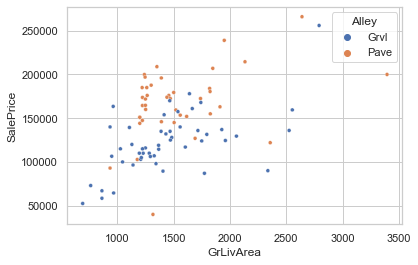

In [552]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Alley", s=15, data=df);

In [553]:
del df["Alley"]

### Building Type

The type of a building clearly affects the valuation. The two types of townhouses as well as the 2-family condo and duplex type are summarized into a single category. This makes sense a) semantically, and b) by looking at the two sub-clusters in the scatter plot.

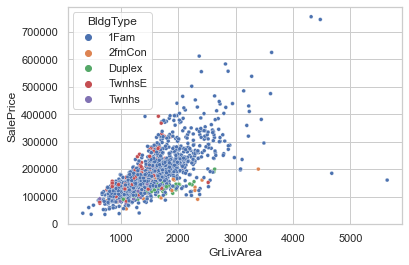

In [555]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="BldgType", s=15, data=df);

In [556]:
# Unify the two townhouse types into one.
df["BldgType"] = df["BldgType"].apply(
    lambda x: "Twnhs" if x in ("TwnhsE", "TwnhsI") else x
)
# Unify the two kinds of 2-family homes.
df["BldgType"] = df["BldgType"].apply(
    lambda x: "2Fam" if x in ("2FmCon", "Duplx") else x
)

In [557]:
build_type = pd.get_dummies(df["BldgType"], prefix="build_type")
df = pd.concat([df, build_type], axis=1)
del df["BldgType"]

In [558]:
new_variables.extend(build_type.columns)

### Air Conditioning

Air conditioning clearly increases the valuation ("steeper" regression line with respect to the overall living area).

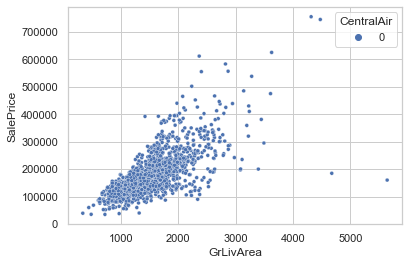

In [576]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="CentralAir", s=15, data=df);

In [69]:
# df["air_cond"] = df["Central Air"].apply(lambda x: 1 if x == "Y" else 0).astype(int)
# del df["Central Air"]

In [579]:
new_variables.append("air_cond")

In [ ]:
df[["air_cond"]].head()

### Exterior

This dimensions tells the main material with which the houses are made of. The category is too diverse and the various grouped scatter plots did not reveal differing slopes. For simplicity, this variable is dropped.

This variable actually also represents tags that could be associated with a house (possibly up to two different tags).

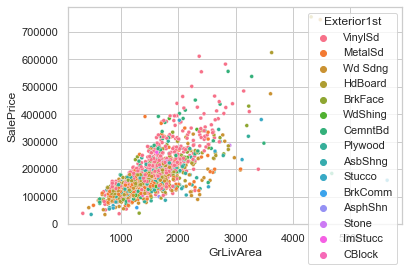

In [584]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Exterior1st", s=15, data=df);

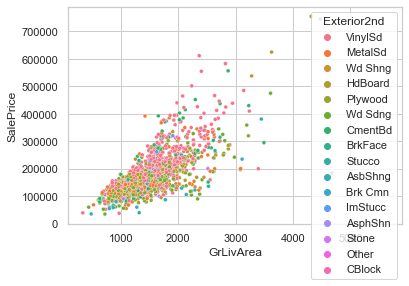

In [586]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Exterior2nd", s=15, data=df);

In [588]:
del df["Exterior1st"]
del df["Exterior2nd"]
# Also discard the associated ordinal variables.
del df["ExterCond"]
del df["ExterQual"]

### Foundation

The type of foundation appears to have an effect. However, only three of the six realizations occur in a large number. Factor variables *found_BrkTil*, *found_CBlock*, and *found_PConc* are extracted but not regarded as "interesting".

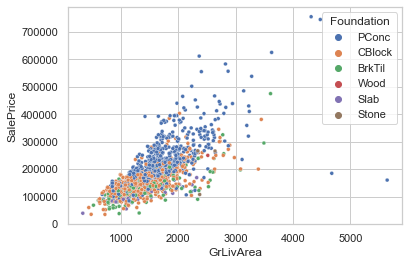

In [590]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Foundation", s=15, data=df);

In [591]:
df["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

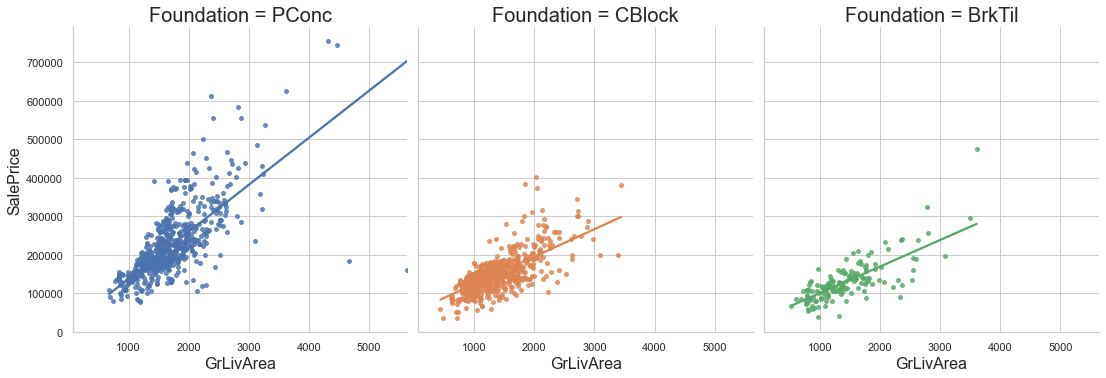

In [592]:
plot = sns.lmplot(
    x="GrLivArea", y="SalePrice", col="Foundation", hue="Foundation",
    col_order=["PConc", "CBlock", "BrkTil"],
    data=df, robust=True, col_wrap=4, ci=None, truncate=True, scatter_kws={"s": 15},
)
# Adjust font sizes.
for ax in plot.axes:
    ax.set_title(ax.get_title(), fontsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

In [593]:
foundation = pd.get_dummies(df["Foundation"], prefix="found")
# Only keep the top 3 realizations.
del foundation["found_Slab"]
del foundation["found_Stone"]
del foundation["found_Wood"]
df = pd.concat([df, foundation], axis=1)
del df["Foundation"]

In [594]:
new_variables.extend(["found_BrkTil", "found_CBlock", "found_PConc"])

### Garage Type

As can be expected, the *Garage Type* looks very similar to the above *has Garage* variable. Therefore, it is dropped.

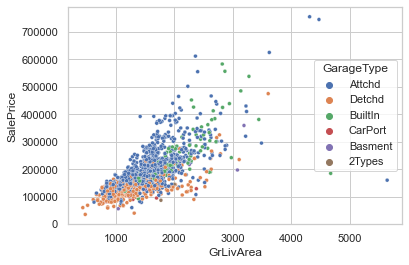

In [596]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="GarageType", s=15, data=df);

### Heating

Most of the houses have gas. The variable is not helpful.

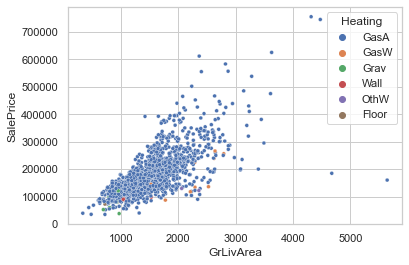

In [598]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="Heating", s=15, data=df);

In [71]:
del df["Heating"]
# # Also discard the associated ordinal variable.
del df["HeatingQC"]

### House Style

In summary, this variable is very similar to the above derived variable *has 2nd Flr*. Therefore, it is dropped.

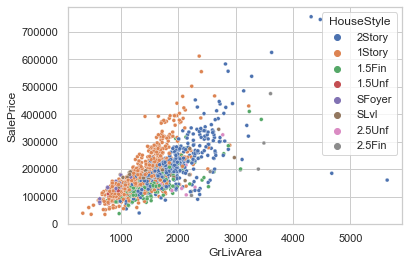

In [603]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="HouseStyle", s=15, data=df);

In [605]:
del df["HouseStyle"]

### Land Contour
This variable is assumed to contain the same information as the ordinal variable Land Slope and is dropped.

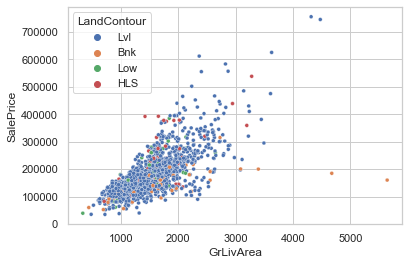

In [607]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="LandContour", s=15, data=df);

In [609]:
del df["LandContour"]

### Lot Configuration

This variable shows no good pattern and is dropped.

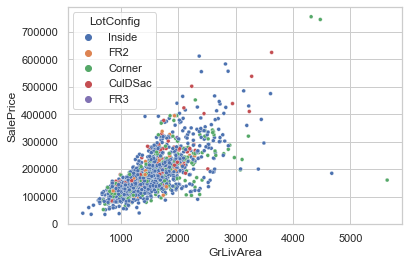

In [611]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="LotConfig", s=15, data=df);

In [613]:
del df["LotConfig"]

### Miscellaneous Features

This variable is basically a "other" field with no pattern.

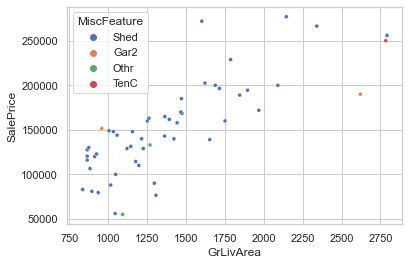

In [615]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="MiscFeature", s=15, data=df);

In [617]:
del df["MiscFeature"]

### Sale Info

Partial and abnormal (= foreclosure) sales seem to make a change with higher and lower prices respectively. These two types will be encoded in factor variables <b>partial_sale</b> and <b>abnormal_sale</b>. The impact seems to be not big though.

In [619]:
df["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

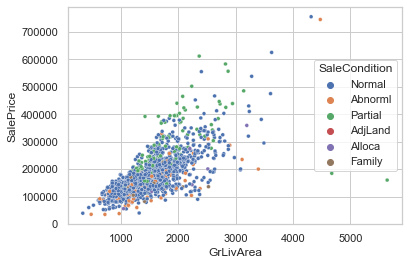

In [621]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="SaleCondition", s=15, data=df);

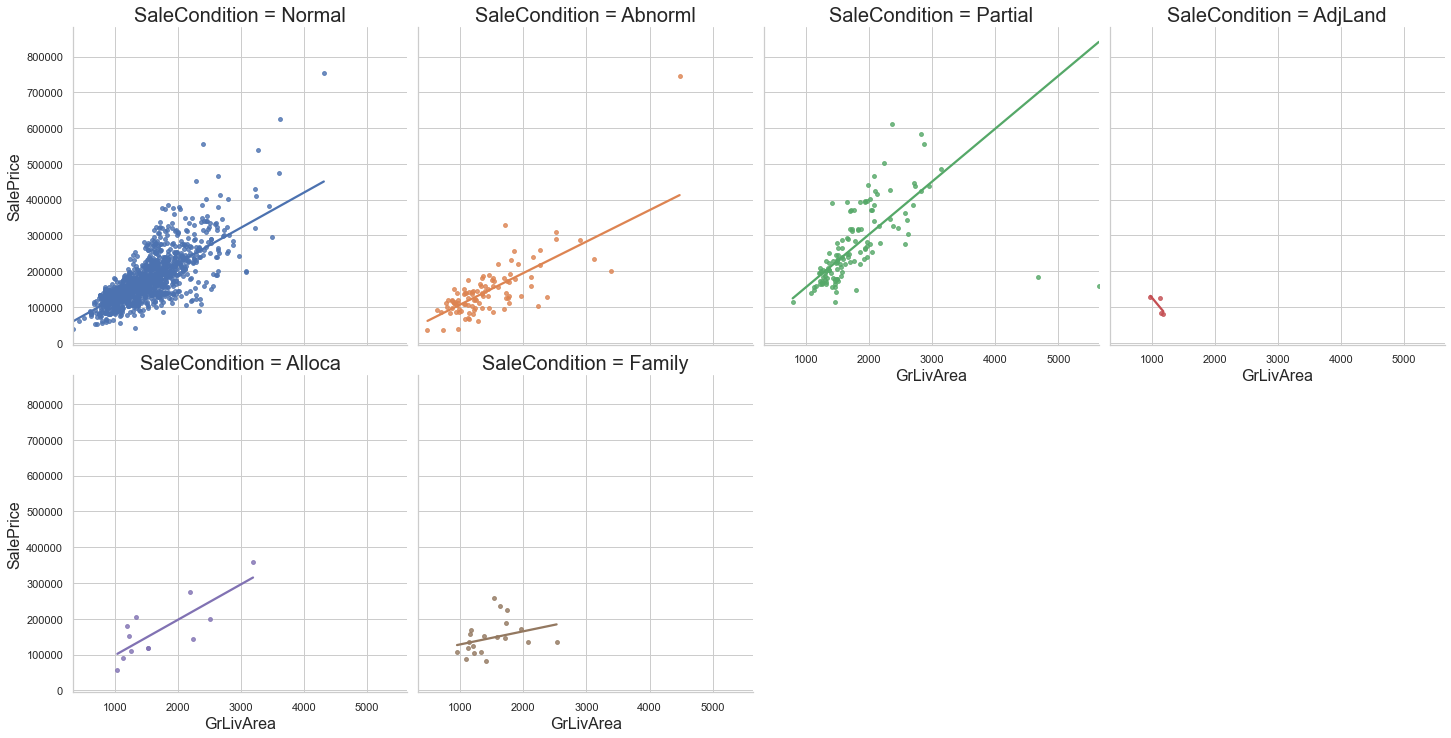

In [622]:
plot = sns.lmplot(
    x="GrLivArea", y="SalePrice", col="SaleCondition", hue="SaleCondition",
    data=df, robust=True, col_wrap=4, ci=None, truncate=True, scatter_kws={"s": 15},
)
# Adjust font sizes.
for ax in plot.axes:
    ax.set_title(ax.get_title(), fontsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

In [623]:
df["partial_sale"] = df["SaleCondition"].apply(lambda x: 1 if x == "Partial" else 0)
df["abnormal_sale"] = df["SaleCondition"].apply(lambda x: 1 if x == "Abnorml" else 0)

Homes that are sold for the first time cleare are priced higher. A factor variable <b>new_home</b> is introduced.

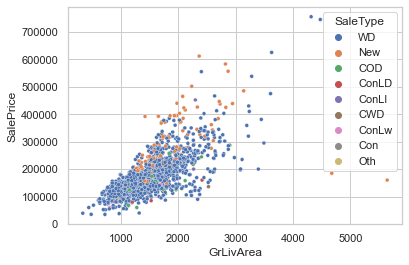

In [625]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="SaleType", s=15, data=df);

In [628]:
df["new_home"] = df["SaleType"].apply(lambda x: 1 if x == "New" else 0)

In [629]:
new_variables.extend(["partial_sale", "abnormal_sale", "new_home"])

In [631]:
del df["SaleType"]

Show summary of counts:

In [632]:
df[["partial_sale", "abnormal_sale", "new_home"]].sum()

partial_sale     125
abnormal_sale    101
new_home         122
dtype: int64